# E3. face detection, land mark

동영상 처리 검출, 키포인트 추정, 추적, 카메라 원근 기술 적용
얼굴인식 카메라 이해, dlib 라이브러리 사용, 이미지 배열 인덱싱 예외 처리

## 1. keypoint detection : landmark, alignment

### 1-1. 사진 준비하기

In [3]:
import cv2 # 이미지 처리를 위한 opencv
import matplotlib.pyplot as plt # 이미지 출력을 위한 matplotlib
import numpy as np
print("완료")

완료


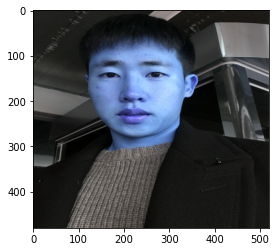

In [15]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (520, 480))    # 520x480의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show() # 푸른색은 opencv의 특징 -> BGR 순 사용

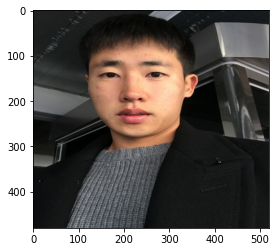

In [16]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # plt.imshow 이전에 RGB 전환
plt.imshow(img_rgb)
plt.show()

### 1-2.  face detection : 얼굴 검출

In [17]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언(Histogram of Oriented Gradients)
print("완료")

완료


In [18]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)  #- (image, num of img pyramid)
print("완료")

완료


rectangles[[(117, 68) (340, 291)]]


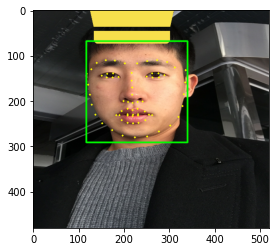

In [91]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 1-3. face landmark localization : 얼굴 랜드마크
#### Object keypoint estimation 알고리즘 : 객체 내부의 점을 찾는 기술
- top-down : bounding box 내부의 keypoint를 예측
- down-top : 이미지 전체에서 keypoint 찾은 후, point 관계에 따라 군집화로 box 생성

In [20]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("완료")

완료


In [22]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


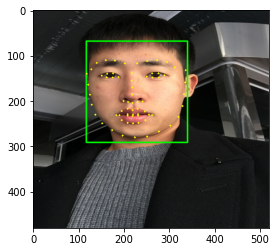

In [23]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 1-4. 스티커 적용하기

In [92]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0] # 인덱스 0, x좌표
    y = landmark[30][1] - dlib_rect.width()//2 # 인덱스 1, y좌표
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w|,h) : (%d,%d)'%(w,h))

(218, 186)
(x,y) : (218,74)
(w|,h) : (224,224)


In [93]:
import os
2
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png'
3
img_sticker = cv2.imread(sticker_path)
4
img_sticker = cv2.resize(img_sticker, (224,224))
5
print (img_sticker.shape)

(224, 224, 3)


In [94]:
refined_x = x - w // 2  # left
refined_y = y - h       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (106,-150)


In [95]:
img_sticker = img_sticker[-refined_y:] # 벗어난 y 크기만큼 crop
print (img_sticker.shape)

(74, 224, 3)


In [96]:
refined_y = 0 # 원본 이미지 경계 값으로 수정
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (106,0)


In [97]:
sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

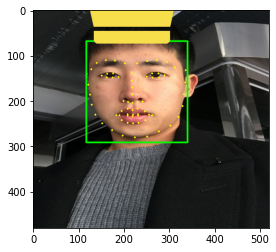

In [98]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

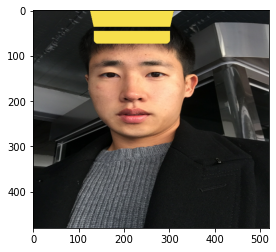

In [86]:
sticker_area = img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()